In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = "{:,.4f}".format

In [30]:
dataSet = './DataSets/GlobalLandTemperaturesByCountry.csv'

In [31]:
df_temp = pd.read_csv(dataSet)
df_temp.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
390462,1868-02-01,-8.3290,2.0220,Norway
80364,1913-06-01,26.6150,0.3520,British Virgin Islands
462903,1968-10-01,10.4560,0.3090,Serbia
512019,1820-11-01,12.3900,1.9090,Syria
32625,1831-03-01,-0.2270,2.0750,Asia


In [36]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])

In [37]:
df_temp.dtypes

dt                                       object
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
year                             datetime64[ns]
dtype: object

In [38]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.8350,0.4780,Åland,1970-02-01
2716,1970-03-01,-1.5830,0.6080,Åland,1970-03-01
2717,1970-04-01,0.4930,0.4630,Åland,1970-04-01
2718,1970-05-01,6.9390,0.5650,Åland,1970-05-01
2719,1970-06-01,14.2520,0.6760,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.0590,1.0220,Zimbabwe,2013-05-01
577458,2013-06-01,17.6130,0.4730,Zimbabwe,2013-06-01
577459,2013-07-01,17.0000,0.4530,Zimbabwe,2013-07-01
577460,2013-08-01,19.7590,0.7170,Zimbabwe,2013-08-01


In [54]:
df_t_avarage = df_temp.groupby(['Country', pd.Grouper(key='year', freq='1Y')]).agg({'AverageTemperature': [np.mean, np.median]})
df_t_avarage

AverageTemperature        
                                     mean  median
Country     year                                 
Afghanistan 1970-12-31            16.0055 16.1990
            1971-12-31            14.8235 14.9340
            1972-12-31            12.5472 13.8725
            1973-12-31            14.2355 14.9130
            1974-12-31            13.3167 13.6160
...                                   ...     ...
Åland       2009-12-31             6.4891  5.5765
            2010-12-31             4.8619  4.7550
            2011-12-31             7.1708  7.4990
            2012-12-31             6.0639  6.2540
            2013-12-31             6.2297  6.0140

[10692 rows x 2 columns]

<AxesSubplot:xlabel='year'>

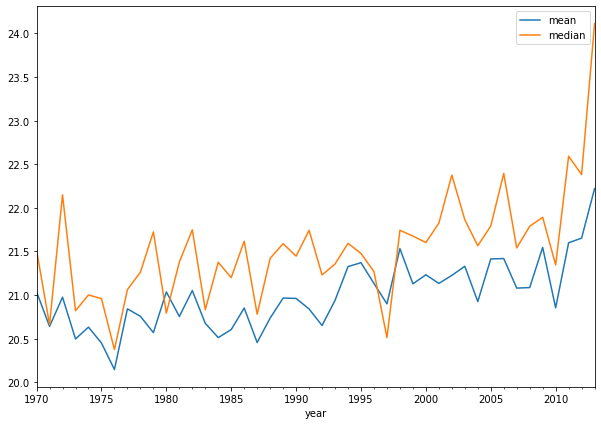

In [74]:
df_t_avarage.xs('Mexico')['AverageTemperature'].plot(figsize=[10, 7])

In [76]:
df_temp_median = df_t_avarage['AverageTemperature'][['median']].reset_index()
df_temp_median

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [77]:
df_temp_median['date'] = df_temp_median['year'].dt.year
df_temp_median['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [78]:
df_temp_median.rename(columns={'median': 'temperatura'}, inplace=True)
df_temp_median

,Country,year,temperatura,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [80]:
df_temp_pivot = df_temp_median.pivot_table(values='temperatura', index='date', columns='Country')
df_temp_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


<AxesSubplot:>

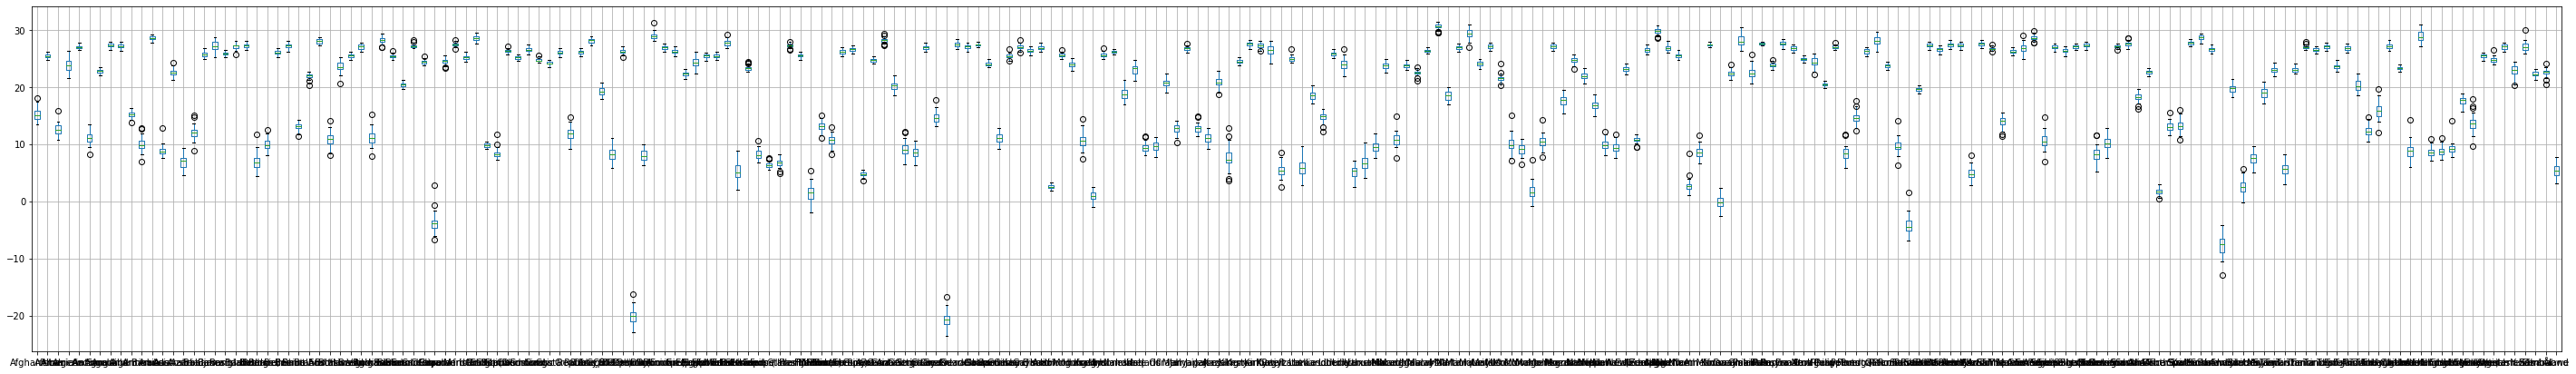

In [95]:
df_temp_pivot.boxplot(figsize=[50, 7])

<AxesSubplot:>

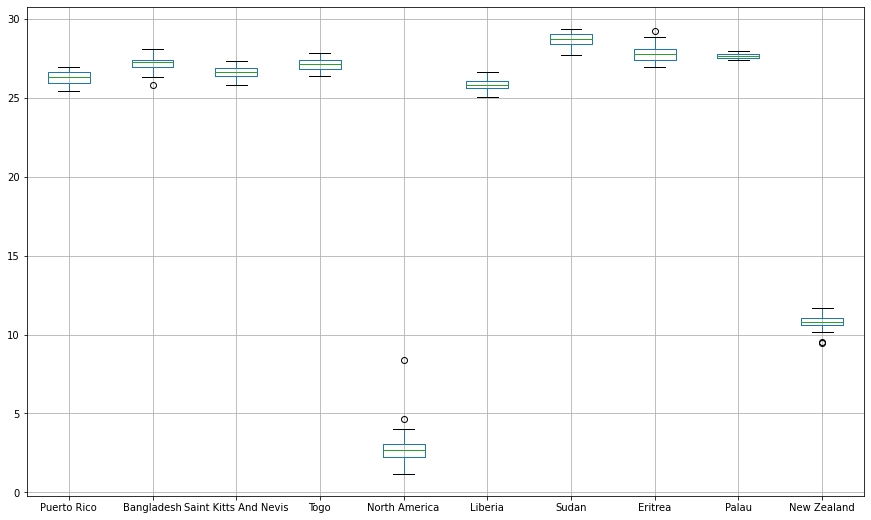

In [94]:
df_temp_pivot.T.sample(10).T.boxplot(figsize=[15, 9])